## Reconhecimento de digitais

In [130]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

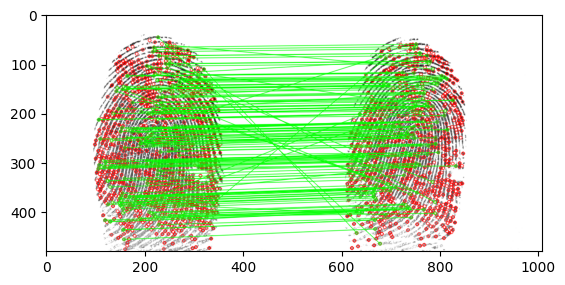

[169, 1525.5]


In [ ]:
def SIFTcomResultado(file1, file2):
    img1=cv2.imread(file1, cv2.IMREAD_GRAYSCALE)
    img2=cv2.imread(file2, cv2.IMREAD_GRAYSCALE)

    sift=cv2.SIFT_create(nOctaveLayers=4, contrastThreshold=0.12, sigma=2.5, enable_precise_upscale=True) 
    #valores sugeridos pelo artigo, com sigma exagerado pra remover pontos de interesse muito pequenos, gerados por regiões de baixa pressão
    kp1, des1=sift.detectAndCompute(img1, None)
    kp2, des2=sift.detectAndCompute(img2, None)

    index_params = dict(algorithm = 1, trees = 5) #alg=1 significa usar indexação em kdtree
    search_params = dict(checks=50)  #quantidade de pontos checados pelo knn
    
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    
    matches = flann.knnMatch(des1,des2,k=2)
    
    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]
    counter=0
    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.8*n.distance:
            counter+=1
            matchesMask[i]=[1,0]
    
    draw_params = dict(matchColor = (0,255,0),
                    singlePointColor = (255,0,0),
                    matchesMask = matchesMask,
                    flags = cv2.DrawMatchesFlags_DEFAULT)
    
    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
    
    plt.imshow(img3,),plt.show()
    
    return [counter, (len(kp1)+len(kp2))/2]

def SIFT(file1, file2):
    img1=cv2.imread(file1, cv2.IMREAD_GRAYSCALE)
    img2=cv2.imread(file2, cv2.IMREAD_GRAYSCALE)

    sift=cv2.SIFT_create(nOctaveLayers=4, contrastThreshold=0.12, sigma=2.5, enable_precise_upscale=True) 
    #valores sugeridos pelo artigo, com sigma exagerado pra remover pontos de interesse muito pequenos, gerados por regiões de baixa pressão
    kp1, des1=sift.detectAndCompute(img1, None)
    kp2, des2=sift.detectAndCompute(img2, None)

    index_params = dict(algorithm = 1, trees = 5) #alg=1 significa usar indexação em kdtree
    search_params = dict(checks=50)  #quantidade de pontos verificados pelo knn 
    
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    
    matches = flann.knnMatch(des1,des2,k=2)
    
    # Need to draw only good matches, so create a mask
    counter=0
    # ratio test as per Lowe's paper
    for (m,n) in matches:
        if m.distance < 0.8*n.distance:
            counter+=1
    
    return [counter, (len(kp1)+len(kp2))/2]

print(SIFTcomResultado("imagens/012_3_1.tif", "imagens/012_3_2.tif"))